# ML-Basic-2024. Дунай А.А.
# Проектная работа: Исследование данных о кибератаках

## 0. Импортируем необходимые библиотеки

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import ipaddress
import requests
from pysxgeo import sxgeo
import seaborn as sns
import re

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
import xgboost
import catboost
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

## 1. Инфомрация о датасете

### 🌐 Источник: Dataset is taken from https://www.kaggle.com/code/saadatkhalid/cyber-attack-eda

### 📆 Duration: The dataset chronicles cyber narratives from January 1, 2020, to October 11, 2023.

### 📊 Shape: Encompassing 40,000 data entries, the records consists of 25 varied metrics.

### Columns:
 - Timestamp: Время, когда произошла сетевая активность.
 - Source IP Address: IP Адрес источника сетевого трафика.
 - Destination IP Address: IP адрес получателя сетевого трафика.
 - Source Port: Сетевой порт источника трафика.
 - Destination Port: Сетевой порт получателя трафика.
 - Protocol: Используемый для взаимодействия протокол (TCP, UDP, ICMP).
 - Packet Length: Размер пакета в байтах.
 - Packet Type: Тип пакета (data packet, control packet).
 - Traffic Type: Тип трафика (web traffic, email traffic).
 - Payload Data: Данные передаваемые в пакете.
 - Malware Indicators: Индикаторы потенциальной вредоносной активности или вредоносного ПО.
 - Anomaly Scores: Оценки указывающие отклонение от нормального поведения, используемые для оценки аномалий.
 - Alerts/Warnings: Уведомления и предупреждения генерируемые системами безопасности и мониторинга.
 - Attack Type: Типы атак (DDoS, SQL injection).
 - Attack Signature: Информация об обнаруженных паттернах или сигнатурах атак.
 - Action Taken: Действия, выполненные в ответ на обнаруженную угрозу.
 - Severity Level: Уровень опасности события (low, medium, high).
 - User Information: Информация о пользователе участвующем в сетевой активности.
 - Device Information: Информация об устройстве участвующем в сетевой активности (device type, operating system).
 - Network Segment: Сегмент или подсеть где была обнаружена сетевая активность.
 - Geo-location Data: Геолокационные данные сопоставленные с IP адресом.
 - Proxy Information: Информации об использовании прокси сервера.
 - Firewall Logs: Логи файервола.
 - IDS/IPS Alerts: События созданные Intrusion Detection Systems (IDS) or Intrusion Prevention Systems (IPS) идентифицирующие подозрительную активность.
 - Log Source: Источник логов .

## Загрузим датасет и посмотрим на него

In [542]:
df = pd.read_csv("cybersecurity_attacks.csv")
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


## Для данного датасета попробуем решить задачу классификации типа атаки по полю "Attack Type".
### В датасете определено всего 3 типа атак
 - DDoS         13428
 - Malware      13307
 - Intrusion    13265

In [543]:
df['Attack Type'].value_counts()

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

### Посмотрим информацию по датасету.
### В датасете присутствую разные типы данных float64(1), int64(3), object(21), а так же присутствую пропуски

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

### Посмотрим зависимости типов атаки от времени (День\год)

In [545]:
def extract_time_features(df, Timestamp):
    
    df[Timestamp] = pd.to_datetime(df[Timestamp])
    df['Year'] = df[Timestamp].dt.year
    df['Month'] = df[Timestamp].dt.month
    df['Day'] = df[Timestamp].dt.day
    df['Hour'] = df[Timestamp].dt.hour
    df['Minute'] = df[Timestamp].dt.minute
    df['Second'] = df[Timestamp].dt.second
    df['DayOfWeek'] = df[Timestamp].dt.dayofweek
    
    return df

df = extract_time_features(df, 'Timestamp')

Summary of the No.of Attacks Year wise
 Attack Type  DDoS  Intrusion  Malware
Year Day                             
2020 1        120        123      118
     2        104        125      124
     3        115        126      108
     4        105        128      125
     5        113        115      115
...           ...        ...      ...
2023 27       108         95       75
     28        94         75       86
     29        78         77       82
     30        79         80       83
     31        46         47       46

[124 rows x 3 columns]


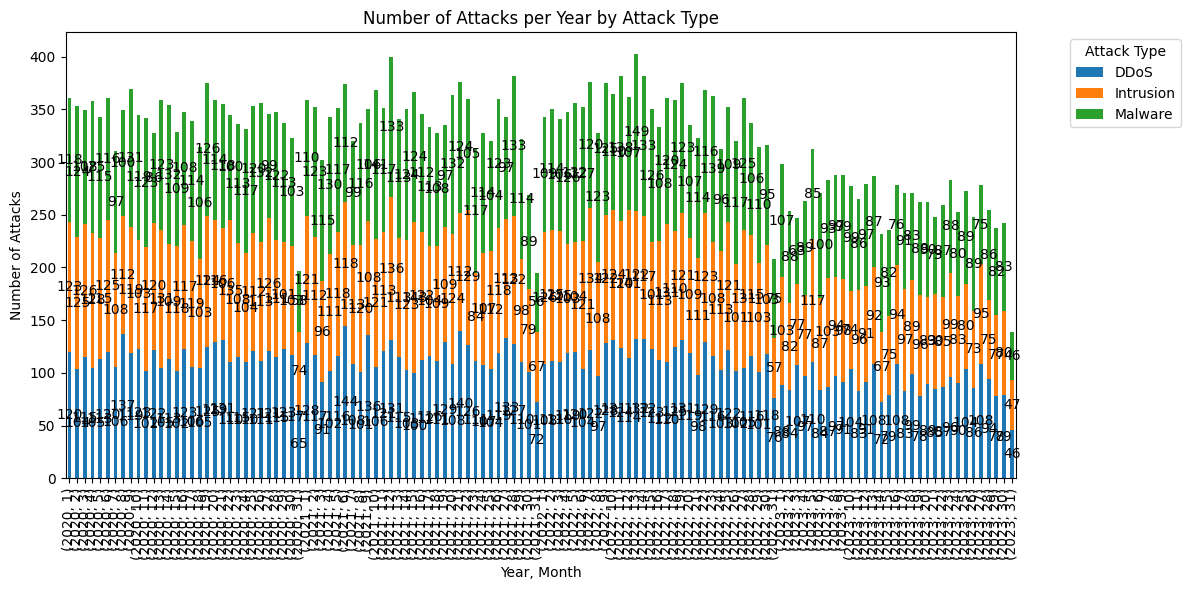

In [546]:
attack_counts = df.groupby(['Year', 'Day', 'Attack Type']).size().unstack(fill_value=0)

print("Summary of the No.of Attacks Year wise\n",attack_counts)

ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Number of Attacks per Year by Attack Type')
plt.xlabel('Year, Month')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.show()

### Из датасета необходимо удалить данные за 31 число, т.к. не во всех месяцах 31 день.

In [547]:
df = df[(df['Day'] < 31)]

Summary of the No.of Attacks Year wise
 Attack Type  DDoS  Intrusion  Malware
Year Day                             
2020 1        120        123      118
     2        104        125      124
     3        115        126      108
     4        105        128      125
     5        113        115      115
...           ...        ...      ...
2023 26        86         73       89
     27       108         95       75
     28        94         75       86
     29        78         77       82
     30        79         80       83

[120 rows x 3 columns]


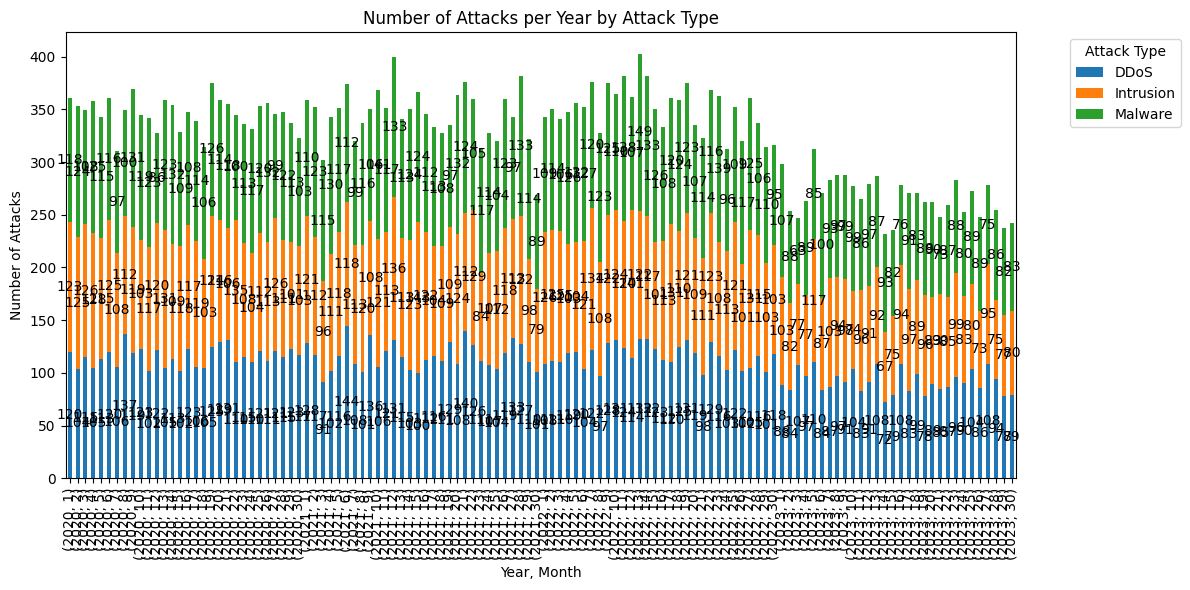

In [548]:
attack_counts = df.groupby(['Year', 'Day', 'Attack Type']).size().unstack(fill_value=0)

print("Summary of the No.of Attacks Year wise\n",attack_counts)

ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Number of Attacks per Year by Attack Type')
plt.xlabel('Year, Month')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.show()

### Посмотрим зависимости типов атаки от времени (Месяц\год)

Summary of the No.of Attacks Year wise
 Attack Type  DDoS  Intrusion  Malware
Year Month                           
2020 1        230        281      275
     2        264        298      268
     3        313        295      268
     4        281        289      255
     5        290        288      301
     6        309        319      261
     7        262        297      296
     8        299        269      307
     9        317        278      282
     10       291        276      315
     11       297        306      312
     12       315        281      291
2021 1        273        274      285
     2        283        254      251
     3        294        289      288
     4        286        275      304
     5        297        291      263
     6        299        333      297
     7        297        289      295
     8        286        288      297
     9        309        293      307
     10       301        255      291
     11       290        280      299
     12   

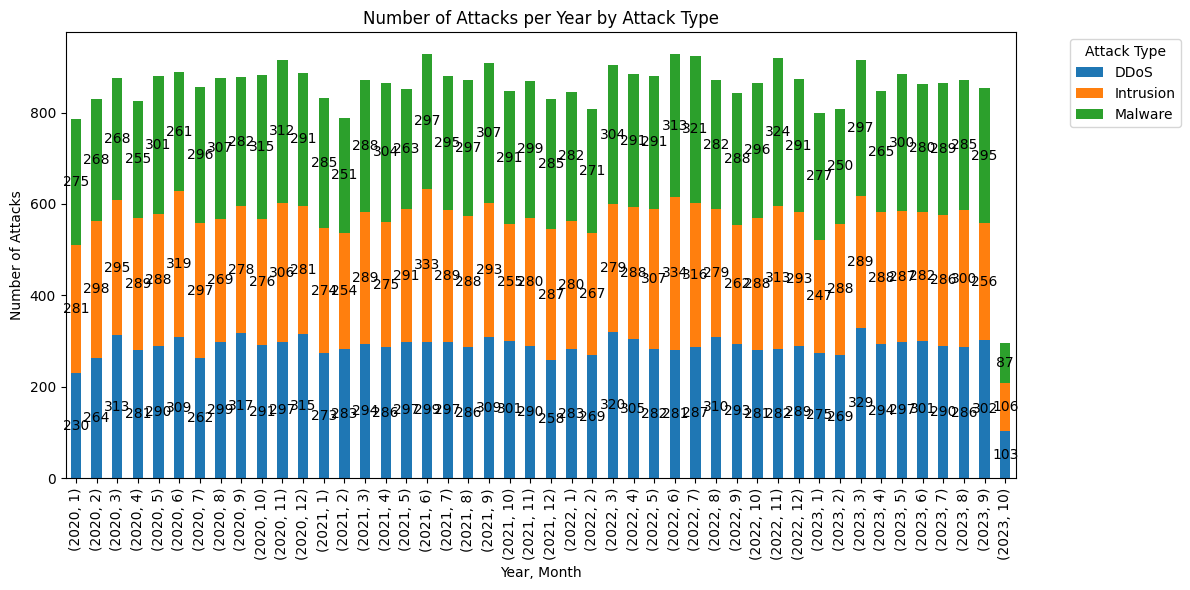

In [549]:
attack_counts = df.groupby(['Year', 'Month', 'Attack Type']).size().unstack(fill_value=0)

print("Summary of the No.of Attacks Year wise\n",attack_counts)

ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Number of Attacks per Year by Attack Type')
plt.xlabel('Year, Month')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.show()

In [550]:
print(df[(df['Year'] == 2023) & (df['Month'] == 10)])

                Timestamp Source IP Address Destination IP Address  \
24    2023-10-06 06:53:51      71.41.31.239         105.193.254.47   
25    2023-10-06 02:37:35      128.47.86.24            9.149.23.14   
184   2023-10-02 03:10:24    206.182.94.109          171.247.4.156   
237   2023-10-02 08:11:45     98.215.64.135         29.135.201.205   
526   2023-10-03 10:32:04   139.114.212.158         108.54.238.113   
...                   ...               ...                    ...   
39328 2023-10-03 08:17:52    107.209.172.71          214.112.7.113   
39410 2023-10-09 00:04:03     41.135.182.89         60.239.114.156   
39615 2023-10-06 13:32:30    110.197.223.60         13.111.158.190   
39639 2023-10-05 10:36:04   105.202.162.113            83.63.15.57   
39999 2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
24           39911             27107      TCP           1386     Control   
25     

### Теперь удалим данные за 10 месяц 2023 года

In [551]:
df = df[(df['Year', 'Month'] != 2023, 10)]
df.drop(df[(df['Year'] = 2023) & (df['Unit_Price'] = 10)].index, inplace=True)

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (4064309092.py, line 2)

Summary of the No.of Attacks Year wise
 Attack Type  DDoS  Intrusion  Malware
Year Month                           
2020 1        230        281      275
     2        264        298      268
     3        313        295      268
     4        281        289      255
     5        290        288      301
     6        309        319      261
     7        262        297      296
     8        299        269      307
     9        317        278      282
     10       291        276      315
     11       297        306      312
     12       315        281      291
2021 1        273        274      285
     2        283        254      251
     3        294        289      288
     4        286        275      304
     5        297        291      263
     6        299        333      297
     7        297        289      295
     8        286        288      297
     9        309        293      307
     10       301        255      291
     11       290        280      299
     12   

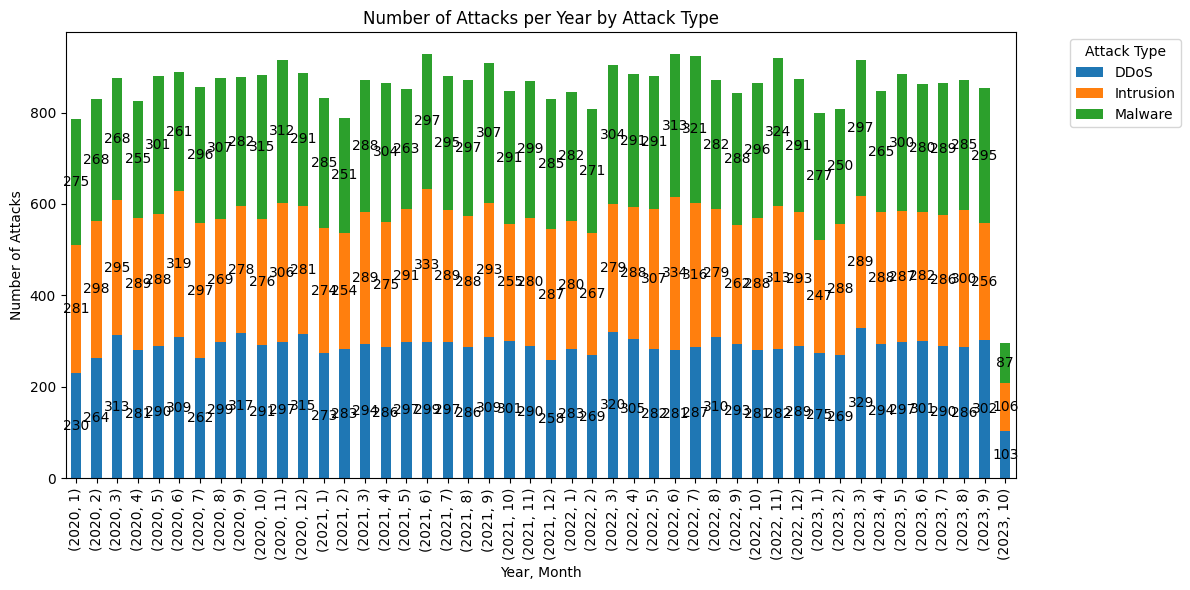

In [552]:
attack_counts = df.groupby(['Year', 'Month', 'Attack Type']).size().unstack(fill_value=0)

print("Summary of the No.of Attacks Year wise\n",attack_counts)

ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Number of Attacks per Year by Attack Type')
plt.xlabel('Year, Month')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.show()

### Посмотрим как зависят переменные 'Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores' от целевой 'Attack Type' с использованием boxplot

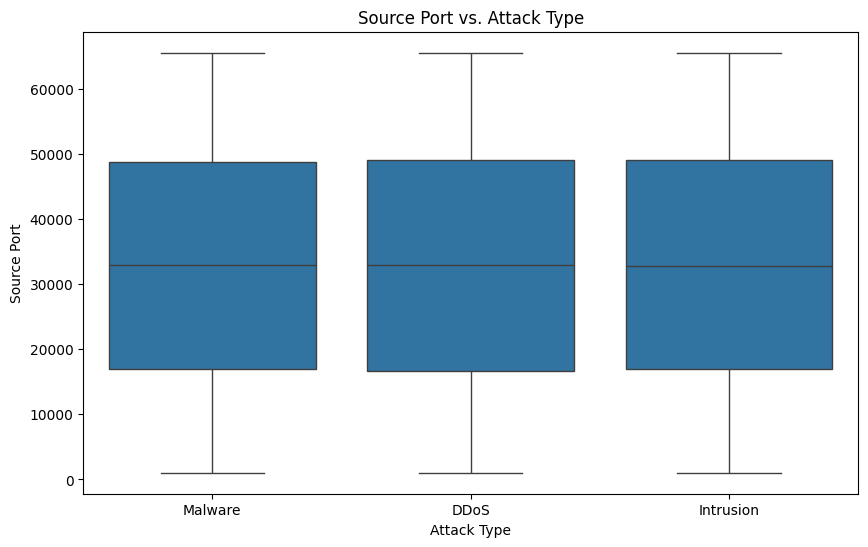

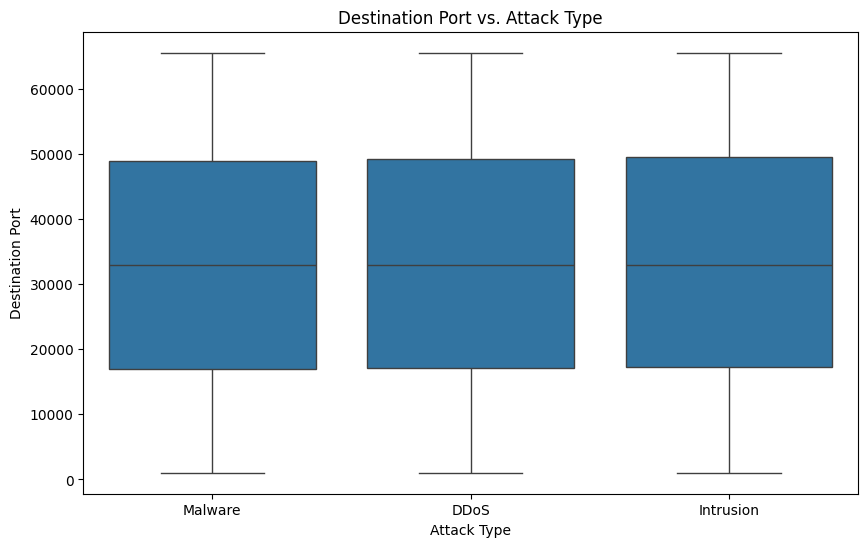

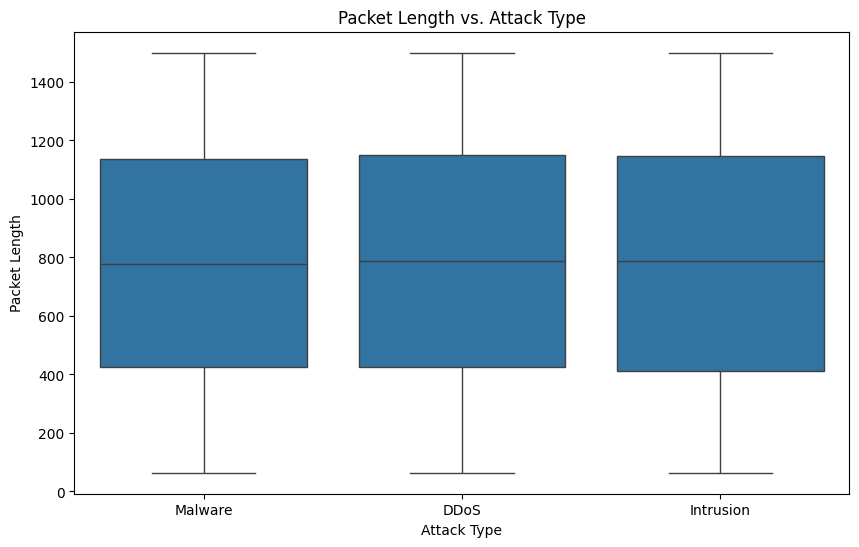

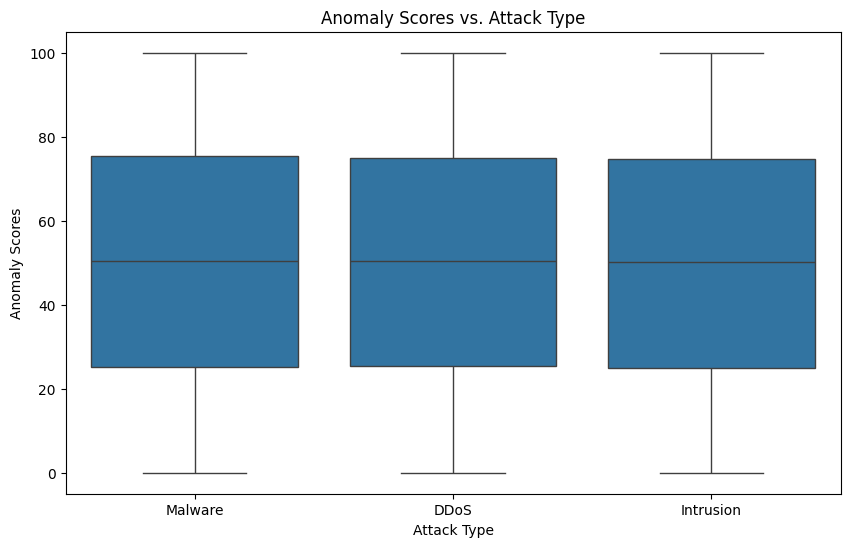

In [553]:
features = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attack Type', y=feature, data=df)
    plt.title(f'{feature} vs. Attack Type')
    plt.xlabel('Attack Type')
    plt.ylabel(feature)
    plt.show()

### Данные имею линейное распределение, выбросов не замечено, но необходимо удалить из датасета все данные 10 месяца 2023 года, чтобы они не влияли на расчеты

### Посмотрим как зависит протокол от типа атаки

  Protocol Attack Type  COUNT
0     ICMP        DDoS   4415
6      UDP        DDoS   4388
2     ICMP     Malware   4386
1     ICMP   Intrusion   4382
3      TCP        DDoS   4366
5      TCP     Malware   4344
8      UDP     Malware   4342
7      UDP   Intrusion   4323
4      TCP   Intrusion   4315


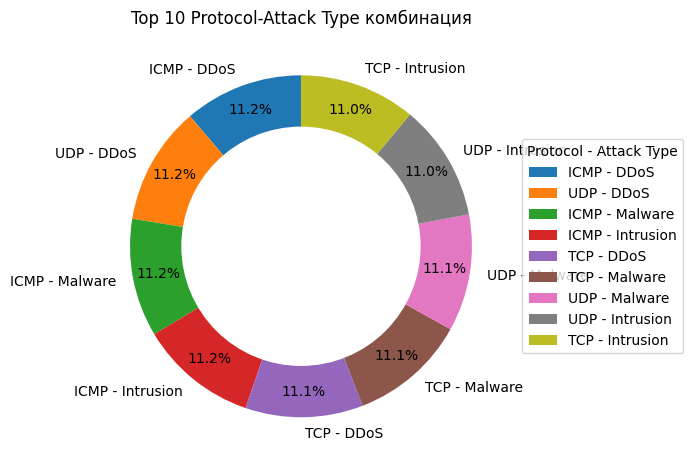

In [554]:
protocol_attack_counts = df.groupby(['Protocol', 'Attack Type']).size().reset_index(name='COUNT')
top_10 = protocol_attack_counts.sort_values('COUNT', ascending=False).head(10)
print(top_10)
plt.plot(figsize=(12, 8))
plt.pie(top_10['COUNT'], labels=top_10.apply(lambda x: f"{x['Protocol']} - {x['Attack Type']}", axis=1), 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85)

center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Top 10 Protocol-Attack Type комбинация')

plt.legend(title='Protocol - Attack Type', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()

plt.show()

## 2. Предобработка данных
### Посчитаем количество пропущенных значений значений в столбцах

In [579]:
df = pd.read_csv("cybersecurity_attacks.csv")
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


In [580]:
df.isnull().sum().sort_values(ascending=False)

Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Attack Type                   0
Geo-location Data             0
Network Segment               0
Device Information            0
User Information              0
Severity Level                0
Action Taken                  0
Attack Signature              0
Timestamp                     0
Source IP Address             0
Anomaly Scores                0
Payload Data                  0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Source Port                   0
Destination IP Address        0
Log Source                    0
dtype: int64

### Посмотрим что за данные в этих столбцах

In [581]:
df[['Alerts/Warnings', 'IDS/IPS Alerts', 'Malware Indicators', 'Malware Indicators', 'Firewall Logs', 'Proxy Information']].nunique()

Alerts/Warnings           1
IDS/IPS Alerts            1
Malware Indicators        1
Malware Indicators        1
Firewall Logs             1
Proxy Information     20148
dtype: int64

###  Столбцы 'Alerts/Warnings', 'IDS/IPS Alerts', 'Malware Indicators', 'Malware Indicators', 'Firewall Logs' можно отнести к бинарным признакам.

###  Столбец 'Proxy Information' так же можно отнести к бинарному признаку, его мы так же приведем к бинарному виду.
####  Напишем функцию, которая будет преобразовывать ip адрес 1, а отсутствие ip адреса в 0 (это будет означать, что proxy для этой атаки не использовался и преобразуем данные в датасете

In [582]:
def ip_to_bool(ip):
    sub = '0.0.0.0/0'
    try:
        ipaddress.ip_network(ip)
        return 1
    except ValueError:
        return 0

df['Proxy Information'] = df['Proxy Information'].apply(ip_to_bool)
df['Proxy Information'].value_counts()

Proxy Information
1    20149
0    19851
Name: count, dtype: int64

### Теперь заменим все пропуски на 0

In [583]:
df.loc[:,:] = df.fillna('No')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      40000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         40000 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

### Таким образом пропусков в данных больше нет
## Посмотрим на поле 'Device Information'
### Поле содержит различную информацию касательно устройства

In [584]:
df['Device Information'].value_counts()

Device Information
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)                                                                                       35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)                                                                                           34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)                                                                                           33
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)                                                                                       31
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)                                                                                       31
                                                                                                                                                      ..
Mozilla/5.0 (Macintosh; PPC Mac OS X 10_9_2; rv:1.9.2.20) Gecko

### Вытащим информацию об используемом браузере и добавим это поле к датасету

In [585]:
df['Browser'] = df['Device Information'].str.split('/').str[0]
df['Browser'].value_counts()

Browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64

### Получим, что в поле содержится информация только о 2х возможных используемых браузерах 
- Mozilla    31951
- Opera       8049

### Попробуем достать больше информации из поля 'Device Information', например тип используемых устройств и ОС

In [586]:
import re
# Составим перечень  возможных ОС и Устройств
patterns = [
    r'Windows',
    r'Linux',
    r'Android',
    r'iPad',
    r'iPod',
    r'iPhone',
    r'Macintosh',
]

def extract_device_or_os(user_agent):
    for pattern in patterns:
        match = re.search(pattern, user_agent, re.I) 
        if match:
            return match.group()
    return 'Unknown'  # Возвращает Unknown, если значение не подобрано

# Добавим к датасету
df['Device/OS'] = df['Device Information'].apply(extract_device_or_os)
df['Device/OS'].value_counts()

Device/OS
Windows      17953
Linux         8840
Macintosh     5813
iPod          2656
Android       1620
iPhone        1567
iPad          1551
Name: count, dtype: int64

### Убедимся, что после преобразований пропусков не появилось

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      40000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         40000 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

### Удалим из датасета поле 'Device Information'

In [588]:
df = df.drop('Device Information', axis = 1)
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


### Посмотрим что содержится в полях формата object

In [589]:
df.describe(include = 'object').T

,count,unique,top,freq
Timestamp,40000,39997,2022-06-11 14:28:15,2
Source IP Address,40000,40000,103.216.15.12,1
Destination IP Address,40000,40000,84.9.164.252,1
Protocol,40000,3,ICMP,13429
Packet Type,40000,2,Control,20237
Traffic Type,40000,3,DNS,13376
Payload Data,40000,40000,Qui natus odio asperiores nam. Optio nobis ius...,1
Malware Indicators,40000,2,IoC Detected,20000
Alerts/Warnings,40000,2,No,20067
Attack Type,40000,3,DDoS,13428


### Удалим из датасета поля 'User Information' и 'Payload Data'

In [590]:
df = df.drop(['Payload Data', 'User Information'], axis = 1)

In [591]:
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Malware Indicators,IoC Detected,IoC Detected,IoC Detected,No,No


### Выделим из поля 'Timestamp' инофрмации и добавим в датасет отдельными полями год, месяц, день, час, минуты, секунды и день недели 

In [592]:
### Учтем исследования проведенные ранее
df.drop(df[df['Timestamp'] >= '2023-10-01 00:00:00'].index, inplace=True)

def extract_time_features(df, Timestamp):
    
    df[Timestamp] = pd.to_datetime(df[Timestamp])
    df['Year'] = df[Timestamp].dt.year
    df['Month'] = df[Timestamp].dt.month
    df['Day'] = df[Timestamp].dt.day
    df['Hour'] = df[Timestamp].dt.hour
    df['Minute'] = df[Timestamp].dt.minute
    df['Second'] = df[Timestamp].dt.second
    df['DayOfWeek'] = df[Timestamp].dt.dayofweek
    
    return df

df = extract_time_features(df, 'Timestamp')
### Учтем исследования проведенные ранее
df.drop(df[df['Day'] == 31].index, inplace=True)

df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Malware Indicators,IoC Detected,IoC Detected,IoC Detected,No,No


### Удалим исходное поле 'Timestamp'

In [593]:
df = df.drop(['Timestamp'], axis = 1)

### Преобразуем поле 'Geo-location Data', разделим на 2 поля, которые будут содержать информацию о городе и штате

In [594]:
df.describe(include = 'object').T

,count,unique,top,freq
Source IP Address,38965,38965,103.216.15.12,1
Destination IP Address,38965,38965,84.9.164.252,1
Protocol,38965,3,ICMP,13097
Packet Type,38965,2,Control,19715
Traffic Type,38965,3,HTTP,13037
Malware Indicators,38965,2,No,19492
Alerts/Warnings,38965,2,No,19551
Attack Type,38965,3,DDoS,13066
Attack Signature,38965,2,Known Pattern A,19537
Action Taken,38965,3,Blocked,13150


In [595]:
df[['Destination City', 'Destination State']] = df['Geo-location Data'].str.split(',', expand=True)
df = df.drop('Geo-location Data', axis = 1)

In [596]:
df.describe(include = 'object').T

,count,unique,top,freq
Source IP Address,38965,38965,103.216.15.12,1
Destination IP Address,38965,38965,84.9.164.252,1
Protocol,38965,3,ICMP,13097
Packet Type,38965,2,Control,19715
Traffic Type,38965,3,HTTP,13037
Malware Indicators,38965,2,No,19492
Alerts/Warnings,38965,2,No,19551
Attack Type,38965,3,DDoS,13066
Attack Signature,38965,2,Known Pattern A,19537
Action Taken,38965,3,Blocked,13150


### Преобразуем поля Source IP Address и Destination IP Address в числовой формат

In [597]:
print("До преобразования: \n",df[['Destination IP Address', 'Source IP Address']].head())

def ip_to_int(ip):
    return int(ipaddress.ip_address(ip))
    
df['Destination IP Address'] = df['Destination IP Address'].apply(ip_to_int)
df['Source IP Address'] = df['Source IP Address'].apply(ip_to_int)

print("После преобразования: \n",df[['Destination IP Address', 'Source IP Address']].head())

До преобразования: 
   Destination IP Address Source IP Address
0           84.9.164.252     103.216.15.12
1         66.191.137.154    78.199.217.198
2          198.219.82.17      63.79.210.48
3        101.228.192.255     163.42.196.10
4        189.243.174.238     71.166.185.76
После преобразования: 
    Destination IP Address  Source IP Address
0              1409918204         1742212876
1              1119848858         1321720262
2              3336262161         1062195760
3              1709490431         2737488906
4              3186863854         1202108748


In [598]:
df.describe(include = 'object').T

,count,unique,top,freq
Protocol,38965,3,ICMP,13097
Packet Type,38965,2,Control,19715
Traffic Type,38965,3,HTTP,13037
Malware Indicators,38965,2,No,19492
Alerts/Warnings,38965,2,No,19551
Attack Type,38965,3,DDoS,13066
Attack Signature,38965,2,Known Pattern A,19537
Action Taken,38965,3,Blocked,13150
Severity Level,38965,3,Medium,13115
Network Segment,38965,3,Segment C,13043


### По датасету видно, что поля Packet Type, Malware Indicators, Alerts/Warnings, Attack Signature, Firewall Logs, IDS/IPS Alerts, Log Source, Browser бинарные признаки. 
### Закодируем их соответствующим образом

In [599]:
df['Packet Type'] = [1 if i == 'Control' else 0 for i in df['Packet Type']]
df['Malware Indicators'] = [1 if i == 'IoC Detected' else 0 for i in df['Malware Indicators']]
df['Alerts/Warnings'] = [1 if i == 'Alert Triggered' else 0 for i in df['Alerts/Warnings']]
df['Attack Signature'] = [1 if i == 'Known Pattern A' else 0 for i in df['Attack Signature']]
df['Firewall Logs'] = [1 if i == 'Log Data' else 0 for i in df['Firewall Logs']]
df['IDS/IPS Alerts'] = [1 if i == 'Alert Data' else 0 for i in df['IDS/IPS Alerts']]
df['Log Source'] = [1 if i == 'Server' else 0 for i in df['Log Source']]

In [600]:
df['Browser'] = [1 if i == 'Mozilla' else 0 for i in df['Browser']]

In [601]:
df.describe(include = 'object').T

,count,unique,top,freq
Protocol,38965,3,ICMP,13097
Traffic Type,38965,3,HTTP,13037
Attack Type,38965,3,DDoS,13066
Action Taken,38965,3,Blocked,13150
Severity Level,38965,3,Medium,13115
Network Segment,38965,3,Segment C,13043
Device/OS,38965,7,Windows,17486
Destination City,38965,316,Ghaziabad,231
Destination State,38965,28,Manipur,1463


In [602]:
df_enc = df

### Поля Protocol, Traffic Type, Attack Type, Action Taken, Severity Level, Network Segment категориальные, закодируем их OneHotEncoder

In [603]:
encoded_features = [
    'Protocol', 'Traffic Type', 'Action Taken','Severity Level', 'Network Segment'
]

ohe = OneHotEncoder(sparse_output=False)
ohe_col = ohe.fit_transform(df_enc[encoded_features])
one_hot_df = pd.DataFrame(ohe_col, columns=ohe.get_feature_names_out(encoded_features))
df_encoded = pd.concat([df_enc, one_hot_df], axis=1)
df_encoded = df_encoded.drop(encoded_features, axis=1)

In [604]:
df_encoded.head().T

,0,1,2,3,4
Source IP Address,1742212876.0,1321720262.0,1062195760.0,2737488906.0,1202108748.0
Destination IP Address,1409918204.0,1119848858.0,3336262161.0,1709490431.0,3186863854.0
Source Port,31225.0,17245.0,16811.0,20018.0,6131.0
Destination Port,17616.0,48166.0,53600.0,32534.0,26646.0
Packet Length,503.0,1174.0,306.0,385.0,1462.0
Packet Type,0.0,0.0,1.0,0.0,0.0
Malware Indicators,1.0,1.0,1.0,0.0,0.0
Anomaly Scores,28.67,51.5,87.42,15.79,0.52
Alerts/Warnings,0.0,0.0,1.0,1.0,1.0
Attack Type,Malware,Malware,DDoS,Malware,DDoS


In [605]:
df_encoded.describe(include = 'object').T

,count,unique,top,freq
Attack Type,38965,3,DDoS,13066
Device/OS,38965,7,Windows,17486
Destination City,38965,316,Ghaziabad,231
Destination State,38965,28,Manipur,1463


In [606]:
#Удалим пропуски из датасета
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39969 entries, 0 to 38884
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Source IP Address          38965 non-null  float64
 1   Destination IP Address     38965 non-null  float64
 2   Source Port                38965 non-null  float64
 3   Destination Port           38965 non-null  float64
 4   Packet Length              38965 non-null  float64
 5   Packet Type                38965 non-null  float64
 6   Malware Indicators         38965 non-null  float64
 7   Anomaly Scores             38965 non-null  float64
 8   Alerts/Warnings            38965 non-null  float64
 9   Attack Type                38965 non-null  object 
 10  Attack Signature           38965 non-null  float64
 11  Proxy Information          38965 non-null  float64
 12  Firewall Logs              38965 non-null  float64
 13  IDS/IPS Alerts             38965 non-null  float64


In [608]:
for col in df_encoded.columns:
    pct_missing = np.mean(df_encoded[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Source IP Address - 3%
Destination IP Address - 3%
Source Port - 3%
Destination Port - 3%
Packet Length - 3%
Packet Type - 3%
Malware Indicators - 3%
Anomaly Scores - 3%
Alerts/Warnings - 3%
Attack Type - 3%
Attack Signature - 3%
Proxy Information - 3%
Firewall Logs - 3%
IDS/IPS Alerts - 3%
Log Source - 3%
Browser - 3%
Device/OS - 3%
Year - 3%
Month - 3%
Day - 3%
Hour - 3%
Minute - 3%
Second - 3%
DayOfWeek - 3%
Destination City - 3%
Destination State - 3%
Protocol_ICMP - 3%
Protocol_TCP - 3%
Protocol_UDP - 3%
Traffic Type_DNS - 3%
Traffic Type_FTP - 3%
Traffic Type_HTTP - 3%
Action Taken_Blocked - 3%
Action Taken_Ignored - 3%
Action Taken_Logged - 3%
Severity Level_High - 3%
Severity Level_Low - 3%
Severity Level_Medium - 3%
Network Segment_Segment A - 3%
Network Segment_Segment B - 3%
Network Segment_Segment C - 3%


In [610]:
df_encoded.dropna(axis = 'index', inplace = True)

In [612]:
for col in df_encoded.columns:
    pct_missing = np.mean(df_encoded[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Source IP Address - 0%
Destination IP Address - 0%
Source Port - 0%
Destination Port - 0%
Packet Length - 0%
Packet Type - 0%
Malware Indicators - 0%
Anomaly Scores - 0%
Alerts/Warnings - 0%
Attack Type - 0%
Attack Signature - 0%
Proxy Information - 0%
Firewall Logs - 0%
IDS/IPS Alerts - 0%
Log Source - 0%
Browser - 0%
Device/OS - 0%
Year - 0%
Month - 0%
Day - 0%
Hour - 0%
Minute - 0%
Second - 0%
DayOfWeek - 0%
Destination City - 0%
Destination State - 0%
Protocol_ICMP - 0%
Protocol_TCP - 0%
Protocol_UDP - 0%
Traffic Type_DNS - 0%
Traffic Type_FTP - 0%
Traffic Type_HTTP - 0%
Action Taken_Blocked - 0%
Action Taken_Ignored - 0%
Action Taken_Logged - 0%
Severity Level_High - 0%
Severity Level_Low - 0%
Severity Level_Medium - 0%
Network Segment_Segment A - 0%
Network Segment_Segment B - 0%
Network Segment_Segment C - 0%


In [613]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37961 entries, 0 to 38964
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Source IP Address          37961 non-null  float64
 1   Destination IP Address     37961 non-null  float64
 2   Source Port                37961 non-null  float64
 3   Destination Port           37961 non-null  float64
 4   Packet Length              37961 non-null  float64
 5   Packet Type                37961 non-null  float64
 6   Malware Indicators         37961 non-null  float64
 7   Anomaly Scores             37961 non-null  float64
 8   Alerts/Warnings            37961 non-null  float64
 9   Attack Type                37961 non-null  object 
 10  Attack Signature           37961 non-null  float64
 11  Proxy Information          37961 non-null  float64
 12  Firewall Logs              37961 non-null  float64
 13  IDS/IPS Alerts             37961 non-null  float64


### Фичи Device/OS, Destination City, Destination State закодируем CountFrequencyEncoder

In [614]:
fe_encoded_features = [
    'Device/OS', 'Destination City', 'Destination State'
]

fe = CountFrequencyEncoder(encoding_method='frequency')
fe.fit(df_encoded[fe_encoded_features])
df_fe = fe.transform(df_encoded[fe_encoded_features])
df_encoded = df_encoded.drop(fe_encoded_features, axis=1)
df_encoded = pd.concat([df_encoded, df_fe], axis=1)


In [615]:
df_encoded.head().T

,0,1,2,3,4
Source IP Address,1742212876.0,1321720262.0,1062195760.0,2737488906.0,1202108748.0
Destination IP Address,1409918204.0,1119848858.0,3336262161.0,1709490431.0,3186863854.0
Source Port,31225.0,17245.0,16811.0,20018.0,6131.0
Destination Port,17616.0,48166.0,53600.0,32534.0,26646.0
Packet Length,503.0,1174.0,306.0,385.0,1462.0
Packet Type,0.0,0.0,1.0,0.0,0.0
Malware Indicators,1.0,1.0,1.0,0.0,0.0
Anomaly Scores,28.67,51.5,87.42,15.79,0.52
Alerts/Warnings,0.0,0.0,1.0,1.0,1.0
Attack Type,Malware,Malware,DDoS,Malware,DDoS


In [616]:
target = ['Attack Type']
oe = OrdinalEncoder()
df_encoded[target]= oe.fit_transform(df_encoded[target])
df_encoded.head().T

,0,1,2,3,4
Source IP Address,1.742213e+09,1.321720e+09,1.062196e+09,2.737489e+09,1.202109e+09
Destination IP Address,1.409918e+09,1.119849e+09,3.336262e+09,1.709490e+09,3.186864e+09
Source Port,3.122500e+04,1.724500e+04,1.681100e+04,2.001800e+04,6.131000e+03
Destination Port,1.761600e+04,4.816600e+04,5.360000e+04,3.253400e+04,2.664600e+04
Packet Length,5.030000e+02,1.174000e+03,3.060000e+02,3.850000e+02,1.462000e+03
Packet Type,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
Malware Indicators,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
Anomaly Scores,2.867000e+01,5.150000e+01,8.742000e+01,1.579000e+01,5.200000e-01
Alerts/Warnings,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Attack Type,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00


## Разделим выборки на обучающие и тестовые. Попробуем модели RandomForestClassifier, XGBClassifier, CatBoost, LGBMClassifier

In [654]:
data = df_encoded
scaler = StandardScaler()
data_drop = data.drop('Attack Type', axis=1)
X = pd.DataFrame(StandardScaler().fit_transform(data_drop), columns = data_drop.columns)
Y = data['Attack Type']
#Train test split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=2)
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((30368, 40), (7593, 40), (30368,), (7593,))

In [655]:
rf_model = RandomForestClassifier(n_estimators=300, oob_score= True)
cb_model = CatBoostClassifier(iterations=300)
lgbm_model = LGBMClassifier(n_estimators=300)
xgb_model = xgboost.XGBClassifier(n_estimators=300, tree_method = "hist", device = "cuda")

estimators=[
    ("RandomForestClassifier", rf_model), 
    ("CatBoostClassifier", cb_model), 
    ("LGBMClassifier", lgbm_model),
    ("XGBClassifier", xgb_model)
] 

In [656]:
rf_model.fit(train_X, train_Y)
cb_model.fit(train_X, train_Y)
lgbm_model.fit(train_X, train_Y)
xgb_model.fit(train_X, train_Y)

Learning rate set to 0.260471
0:	learn: 1.0979257	total: 5.62ms	remaining: 1.68s
1:	learn: 1.0970497	total: 11.1ms	remaining: 1.65s
2:	learn: 1.0960723	total: 16.5ms	remaining: 1.64s
3:	learn: 1.0952225	total: 21.4ms	remaining: 1.59s
4:	learn: 1.0943471	total: 27ms	remaining: 1.59s
5:	learn: 1.0937274	total: 31.8ms	remaining: 1.56s
6:	learn: 1.0930668	total: 37ms	remaining: 1.55s
7:	learn: 1.0925301	total: 42.2ms	remaining: 1.54s
8:	learn: 1.0916095	total: 47.6ms	remaining: 1.54s
9:	learn: 1.0906718	total: 52.8ms	remaining: 1.53s
10:	learn: 1.0896600	total: 58ms	remaining: 1.52s
11:	learn: 1.0887498	total: 63.1ms	remaining: 1.51s
12:	learn: 1.0879186	total: 68.4ms	remaining: 1.51s
13:	learn: 1.0869707	total: 73.5ms	remaining: 1.5s
14:	learn: 1.0861943	total: 78.7ms	remaining: 1.5s
15:	learn: 1.0854256	total: 83.7ms	remaining: 1.49s
16:	learn: 1.0845434	total: 89.6ms	remaining: 1.49s
17:	learn: 1.0837869	total: 95.7ms	remaining: 1.5s
18:	learn: 1.0830411	total: 101ms	remaining: 1.49s
19

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [657]:
rf_cv = cross_val_score(rf_model, train_X, train_Y, scoring="accuracy").mean()
rf_ts = accuracy_score(rf_model.predict(test_X), test_Y)
rf_trs = accuracy_score(rf_model.predict(train_X), train_Y)

cb_cv = cross_val_score(cb_model, train_X, train_Y, scoring="accuracy").mean()
cb_ts = accuracy_score(cb_model.predict(test_X), test_Y)
cb_trs = accuracy_score(cb_model.predict(train_X), train_Y)

lgbm_cv = cross_val_score(lgbm_model, train_X, train_Y, scoring="accuracy").mean()
lgbm_ts = accuracy_score(lgbm_model.predict(test_X), test_Y)
lgbm_trs = accuracy_score(lgbm_model.predict(train_X), train_Y)

xgb_cv = cross_val_score(xgb_model, train_X, train_Y, scoring="accuracy").mean()
xgb_ts = accuracy_score(xgb_model.predict(test_X), test_Y)
xgb_trs = accuracy_score(xgb_model.predict(train_X), train_Y)

Learning rate set to 0.257523
0:	learn: 1.0977262	total: 5.48ms	remaining: 1.64s
1:	learn: 1.0966628	total: 10.4ms	remaining: 1.55s
2:	learn: 1.0960474	total: 15.3ms	remaining: 1.51s
3:	learn: 1.0948289	total: 20ms	remaining: 1.48s
4:	learn: 1.0936039	total: 24.6ms	remaining: 1.45s
5:	learn: 1.0927736	total: 29.7ms	remaining: 1.45s
6:	learn: 1.0917103	total: 34.5ms	remaining: 1.44s
7:	learn: 1.0906680	total: 39ms	remaining: 1.42s
8:	learn: 1.0894654	total: 43.4ms	remaining: 1.4s
9:	learn: 1.0886394	total: 47.7ms	remaining: 1.38s
10:	learn: 1.0876433	total: 52.3ms	remaining: 1.37s
11:	learn: 1.0868520	total: 57.5ms	remaining: 1.38s
12:	learn: 1.0854611	total: 62.9ms	remaining: 1.39s
13:	learn: 1.0844348	total: 68.1ms	remaining: 1.39s
14:	learn: 1.0833828	total: 73.1ms	remaining: 1.39s
15:	learn: 1.0821804	total: 77.5ms	remaining: 1.38s
16:	learn: 1.0811119	total: 81.8ms	remaining: 1.36s
17:	learn: 1.0804580	total: 86.4ms	remaining: 1.35s
18:	learn: 1.0792494	total: 90.8ms	remaining: 1.3

In [658]:
print(f'RandomForestClassifier')
print(f'Test score estimate using Cross-Validation {rf_cv:.4f}')
print(f'Actual test score: {rf_ts:.4f}')
print(f'Train score: {rf_trs:.4f}\n')

print(f'CatBoostClassifier')
print(f'Test score estimate using Cross-Validation {cb_cv:.4f}')
print(f'Actual test score: {cb_ts:.4f}')
print(f'Train score: {cb_trs:.4f}\n')

print(f'LGBMClassifier')
print(f'Test score estimate using Cross-Validation {lgbm_cv:.4f}')
print(f'Actual test score: {lgbm_ts:.4f}')
print(f'Train score: {lgbm_trs:.4f}\n')

print(f'XGBClassifier')
print(f'Test score estimate using Cross-Validation {xgb_cv:.4f}')
print(f'Actual test score: {xgb_ts:.4f}')
print(f'Train score: {xgb_trs:.4f}\n')

RandomForestClassifier
Test score estimate using Cross-Validation 0.3290
Actual test score: 0.3374
Train score: 1.0000

CatBoostClassifier
Test score estimate using Cross-Validation 0.3321
Actual test score: 0.3286
Train score: 0.6985

LGBMClassifier
Test score estimate using Cross-Validation 0.3298
Actual test score: 0.3274
Train score: 0.9035

XGBClassifier
Test score estimate using Cross-Validation 0.3341
Actual test score: 0.3311
Train score: 0.9885



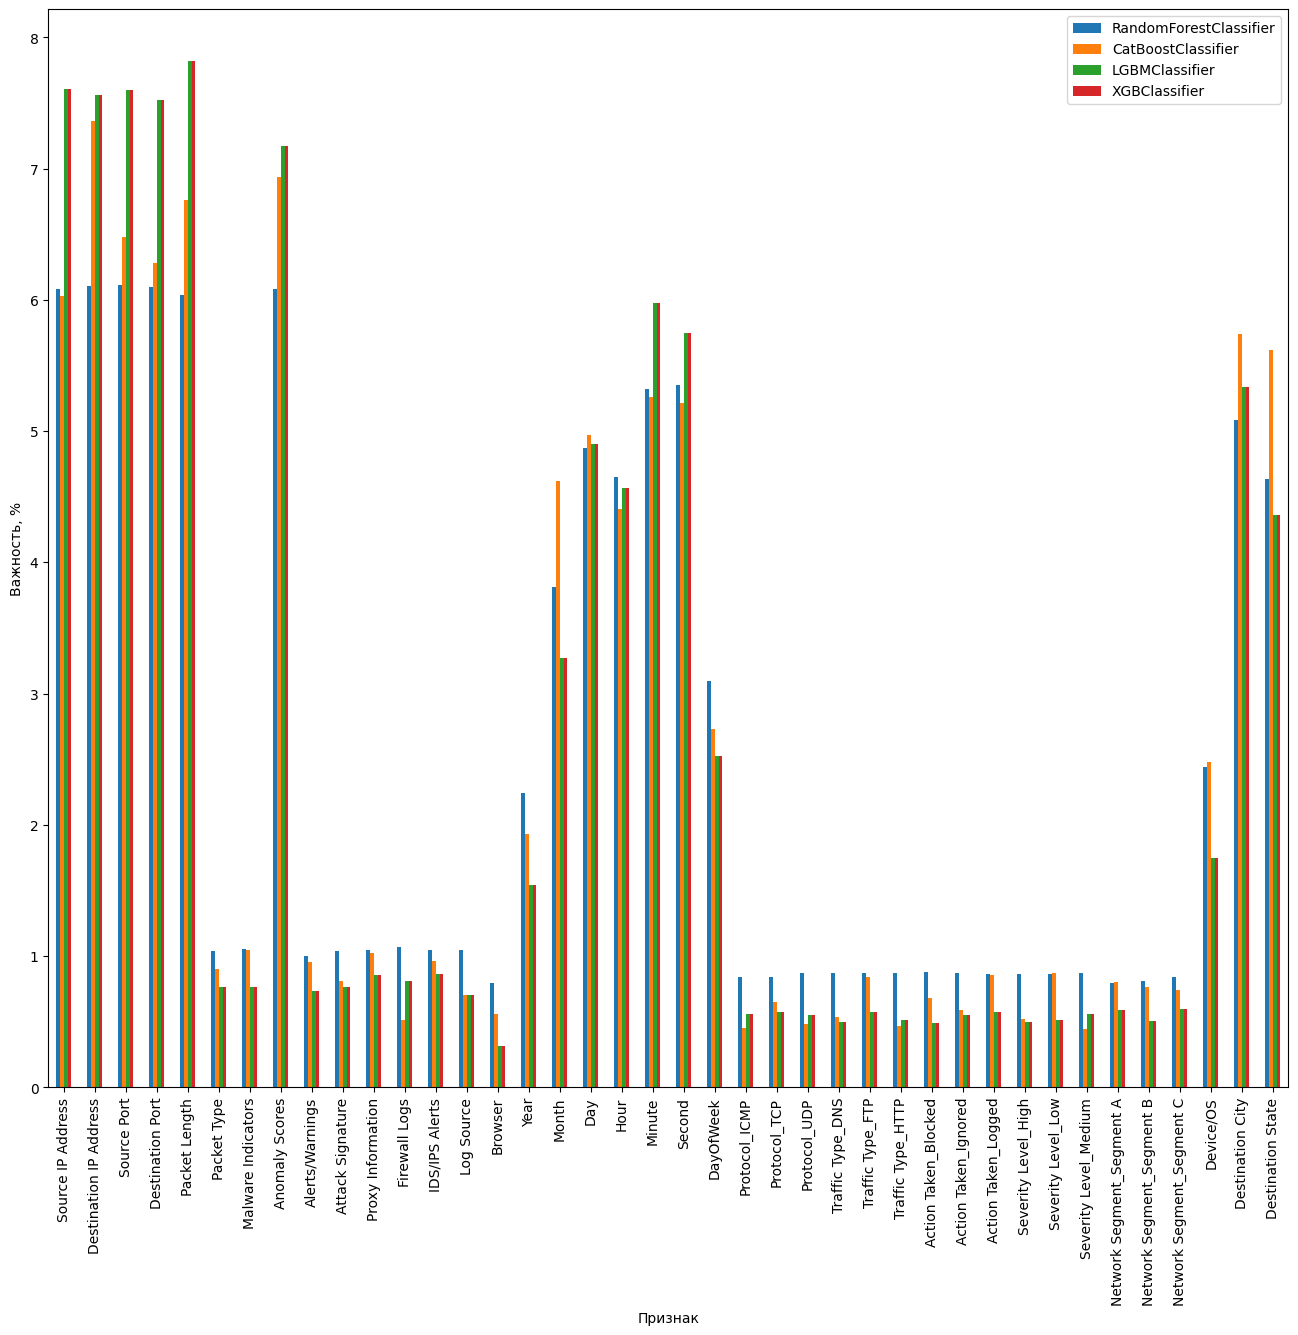

In [659]:
fe_data = pd.DataFrame({'RandomForestClassifier' : list(map(lambda x: x*100, rf_model.feature_importances_)),
                        'CatBoostClassifier'  : cb_model.feature_importances_,
                        'LGBMClassifier' : (lgbm_model.feature_importances_ / sum(lgbm_model.feature_importances_)) * 100,
                        'XGBClassifier': (lgbm_model.feature_importances_ / sum(lgbm_model.feature_importances_)) * 100                        
                       }, index=X.columns)

fig, ax = plt.subplots(figsize=(16,14))
ax = fe_data.plot.bar(ax=ax)
ax.set_xlabel('Признак')
ax.set_ylabel('Важность, %')
plt.show()

### Откажемся от признаков имеющих слабое влияние, и посмотрим на результаты обучения

In [666]:
noninteresting_feature = [
    'Packet Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Signature', 'Proxy Information',
    'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Browser', 'Protocol_ICMP',
       'Protocol_TCP', 'Protocol_UDP', 'Traffic Type_DNS', 'Traffic Type_FTP',
       'Traffic Type_HTTP', 'Action Taken_Blocked', 'Action Taken_Ignored',
       'Action Taken_Logged', 'Severity Level_High', 'Severity Level_Low',
       'Severity Level_Medium', 'Network Segment_Segment A',
       'Network Segment_Segment B', 'Network Segment_Segment C', 'Attack Type'
]


data = df_encoded
scaler = StandardScaler()
data_drop = data.drop(noninteresting_feature, axis=1)
X = pd.DataFrame(StandardScaler().fit_transform(data_drop), columns = data_drop.columns)
Y = data['Attack Type']
#Train test split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=2)
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((30368, 16), (7593, 16), (30368,), (7593,))

In [667]:
rf_model = RandomForestClassifier(n_estimators=300, oob_score= True)
cb_model = CatBoostClassifier(iterations=300)
lgbm_model = LGBMClassifier(n_estimators=300)
xgb_model = xgboost.XGBClassifier(n_estimators=300, tree_method = "hist", device = "cuda")

estimators=[
    ("RandomForestClassifier", rf_model), 
    ("CatBoostClassifier", cb_model), 
    ("LGBMClassifier", lgbm_model),
    ("XGBClassifier", xgb_model)
] 

In [668]:
rf_model.fit(train_X, train_Y)
cb_model.fit(train_X, train_Y)
lgbm_model.fit(train_X, train_Y)
xgb_model.fit(train_X, train_Y)

Learning rate set to 0.260471
0:	learn: 1.0978018	total: 5.18ms	remaining: 1.55s
1:	learn: 1.0969436	total: 10.1ms	remaining: 1.51s
2:	learn: 1.0962484	total: 15ms	remaining: 1.48s
3:	learn: 1.0953210	total: 19.4ms	remaining: 1.44s
4:	learn: 1.0945895	total: 24.3ms	remaining: 1.43s
5:	learn: 1.0934945	total: 29ms	remaining: 1.42s
6:	learn: 1.0924846	total: 33.8ms	remaining: 1.41s
7:	learn: 1.0913844	total: 38.9ms	remaining: 1.42s
8:	learn: 1.0904628	total: 43.9ms	remaining: 1.42s
9:	learn: 1.0897703	total: 48.5ms	remaining: 1.41s
10:	learn: 1.0890410	total: 53.3ms	remaining: 1.4s
11:	learn: 1.0881494	total: 57.9ms	remaining: 1.39s
12:	learn: 1.0876561	total: 62.5ms	remaining: 1.38s
13:	learn: 1.0869933	total: 67.2ms	remaining: 1.37s
14:	learn: 1.0866176	total: 71.9ms	remaining: 1.37s
15:	learn: 1.0857557	total: 76.9ms	remaining: 1.36s
16:	learn: 1.0851576	total: 81.7ms	remaining: 1.36s
17:	learn: 1.0847218	total: 86.3ms	remaining: 1.35s
18:	learn: 1.0838927	total: 91ms	remaining: 1.34s

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [669]:
rf_cv = cross_val_score(rf_model, train_X, train_Y, scoring="accuracy").mean()
rf_ts = accuracy_score(rf_model.predict(test_X), test_Y)
rf_trs = accuracy_score(rf_model.predict(train_X), train_Y)

cb_cv = cross_val_score(cb_model, train_X, train_Y, scoring="accuracy").mean()
cb_ts = accuracy_score(cb_model.predict(test_X), test_Y)
cb_trs = accuracy_score(cb_model.predict(train_X), train_Y)

lgbm_cv = cross_val_score(lgbm_model, train_X, train_Y, scoring="accuracy").mean()
lgbm_ts = accuracy_score(lgbm_model.predict(test_X), test_Y)
lgbm_trs = accuracy_score(lgbm_model.predict(train_X), train_Y)

xgb_cv = cross_val_score(xgb_model, train_X, train_Y, scoring="accuracy").mean()
xgb_ts = accuracy_score(xgb_model.predict(test_X), test_Y)
xgb_trs = accuracy_score(xgb_model.predict(train_X), train_Y)

Learning rate set to 0.257523
0:	learn: 1.0972708	total: 4.63ms	remaining: 1.38s
1:	learn: 1.0961599	total: 9.12ms	remaining: 1.36s
2:	learn: 1.0954877	total: 13.3ms	remaining: 1.32s
3:	learn: 1.0942913	total: 17.6ms	remaining: 1.3s
4:	learn: 1.0933819	total: 21.9ms	remaining: 1.29s
5:	learn: 1.0923272	total: 26.2ms	remaining: 1.28s
6:	learn: 1.0912800	total: 30ms	remaining: 1.25s
7:	learn: 1.0905518	total: 33.9ms	remaining: 1.24s
8:	learn: 1.0897162	total: 38ms	remaining: 1.23s
9:	learn: 1.0889431	total: 42.6ms	remaining: 1.24s
10:	learn: 1.0876786	total: 46.7ms	remaining: 1.23s
11:	learn: 1.0866155	total: 50.8ms	remaining: 1.22s
12:	learn: 1.0858179	total: 54.7ms	remaining: 1.21s
13:	learn: 1.0848070	total: 58.8ms	remaining: 1.2s
14:	learn: 1.0840960	total: 62.9ms	remaining: 1.19s
15:	learn: 1.0833122	total: 66.9ms	remaining: 1.19s
16:	learn: 1.0821064	total: 71ms	remaining: 1.18s
17:	learn: 1.0811063	total: 75ms	remaining: 1.17s
18:	learn: 1.0804233	total: 79.3ms	remaining: 1.17s
19

In [670]:
print(f'RandomForestClassifier')
print(f'Test score estimate using Cross-Validation {rf_cv:.4f}')
print(f'Actual test score: {rf_ts:.4f}')
print(f'Train score: {rf_trs:.4f}\n')

print(f'CatBoostClassifier')
print(f'Test score estimate using Cross-Validation {cb_cv:.4f}')
print(f'Actual test score: {cb_ts:.4f}')
print(f'Train score: {cb_trs:.4f}\n')

print(f'LGBMClassifier')
print(f'Test score estimate using Cross-Validation {lgbm_cv:.4f}')
print(f'Actual test score: {lgbm_ts:.4f}')
print(f'Train score: {lgbm_trs:.4f}\n')

print(f'XGBClassifier')
print(f'Test score estimate using Cross-Validation {xgb_cv:.4f}')
print(f'Actual test score: {xgb_ts:.4f}')
print(f'Train score: {xgb_trs:.4f}\n')

RandomForestClassifier
Test score estimate using Cross-Validation 0.3281
Actual test score: 0.3439
Train score: 1.0000

CatBoostClassifier
Test score estimate using Cross-Validation 0.3350
Actual test score: 0.3265
Train score: 0.6737

LGBMClassifier
Test score estimate using Cross-Validation 0.3295
Actual test score: 0.3324
Train score: 0.8765

XGBClassifier
Test score estimate using Cross-Validation 0.3321
Actual test score: 0.3310
Train score: 0.9805



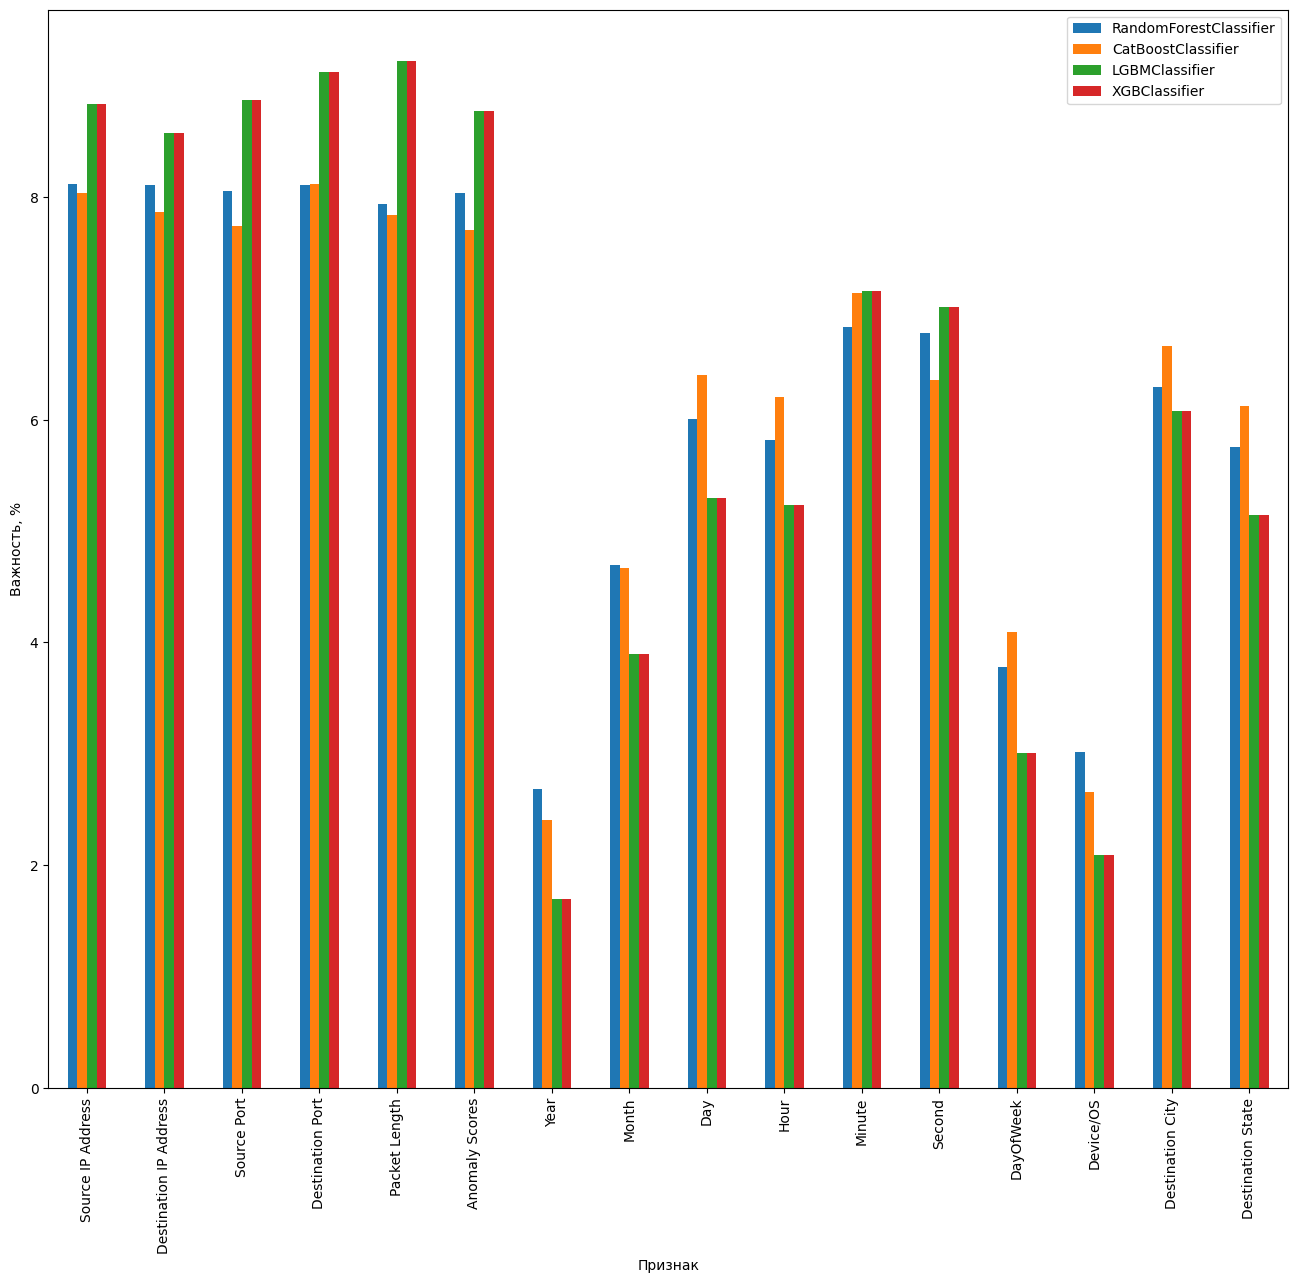

In [671]:
fe_data = pd.DataFrame({'RandomForestClassifier' : list(map(lambda x: x*100, rf_model.feature_importances_)),
                        'CatBoostClassifier'  : cb_model.feature_importances_,
                        'LGBMClassifier' : (lgbm_model.feature_importances_ / sum(lgbm_model.feature_importances_)) * 100,
                        'XGBClassifier': (lgbm_model.feature_importances_ / sum(lgbm_model.feature_importances_)) * 100                        
                       }, index=X.columns)

fig, ax = plt.subplots(figsize=(16,14))
ax = fe_data.plot.bar(ax=ax)
ax.set_xlabel('Признак')
ax.set_ylabel('Важность, %')
plt.show()

### Посмотрим матрицу корреляции для фич

In [672]:
droping_feature = [
    'Packet Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Signature', 'Proxy Information',
    'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Browser', 'Protocol_ICMP',
       'Protocol_TCP', 'Protocol_UDP', 'Traffic Type_DNS', 'Traffic Type_FTP',
       'Traffic Type_HTTP', 'Action Taken_Blocked', 'Action Taken_Ignored',
       'Action Taken_Logged', 'Severity Level_High', 'Severity Level_Low',
       'Severity Level_Medium', 'Network Segment_Segment A',
       'Network Segment_Segment B', 'Network Segment_Segment C'
]

In [673]:
data_drop_cor = data.drop(droping_feature, axis=1)

In [674]:
data_drop_cor.columns

Index(['Source IP Address', 'Destination IP Address', 'Source Port',
       'Destination Port', 'Packet Length', 'Anomaly Scores', 'Attack Type',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'DayOfWeek',
       'Device/OS', 'Destination City', 'Destination State'],
      dtype='object')

In [675]:
corr_features = [
'Source IP Address', 'Destination IP Address', 'Source Port',
       'Destination Port', 'Packet Length', 'Anomaly Scores', 'Attack Type',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'DayOfWeek',
       'Device/OS', 'Destination City', 'Destination State'
]

<Axes: >

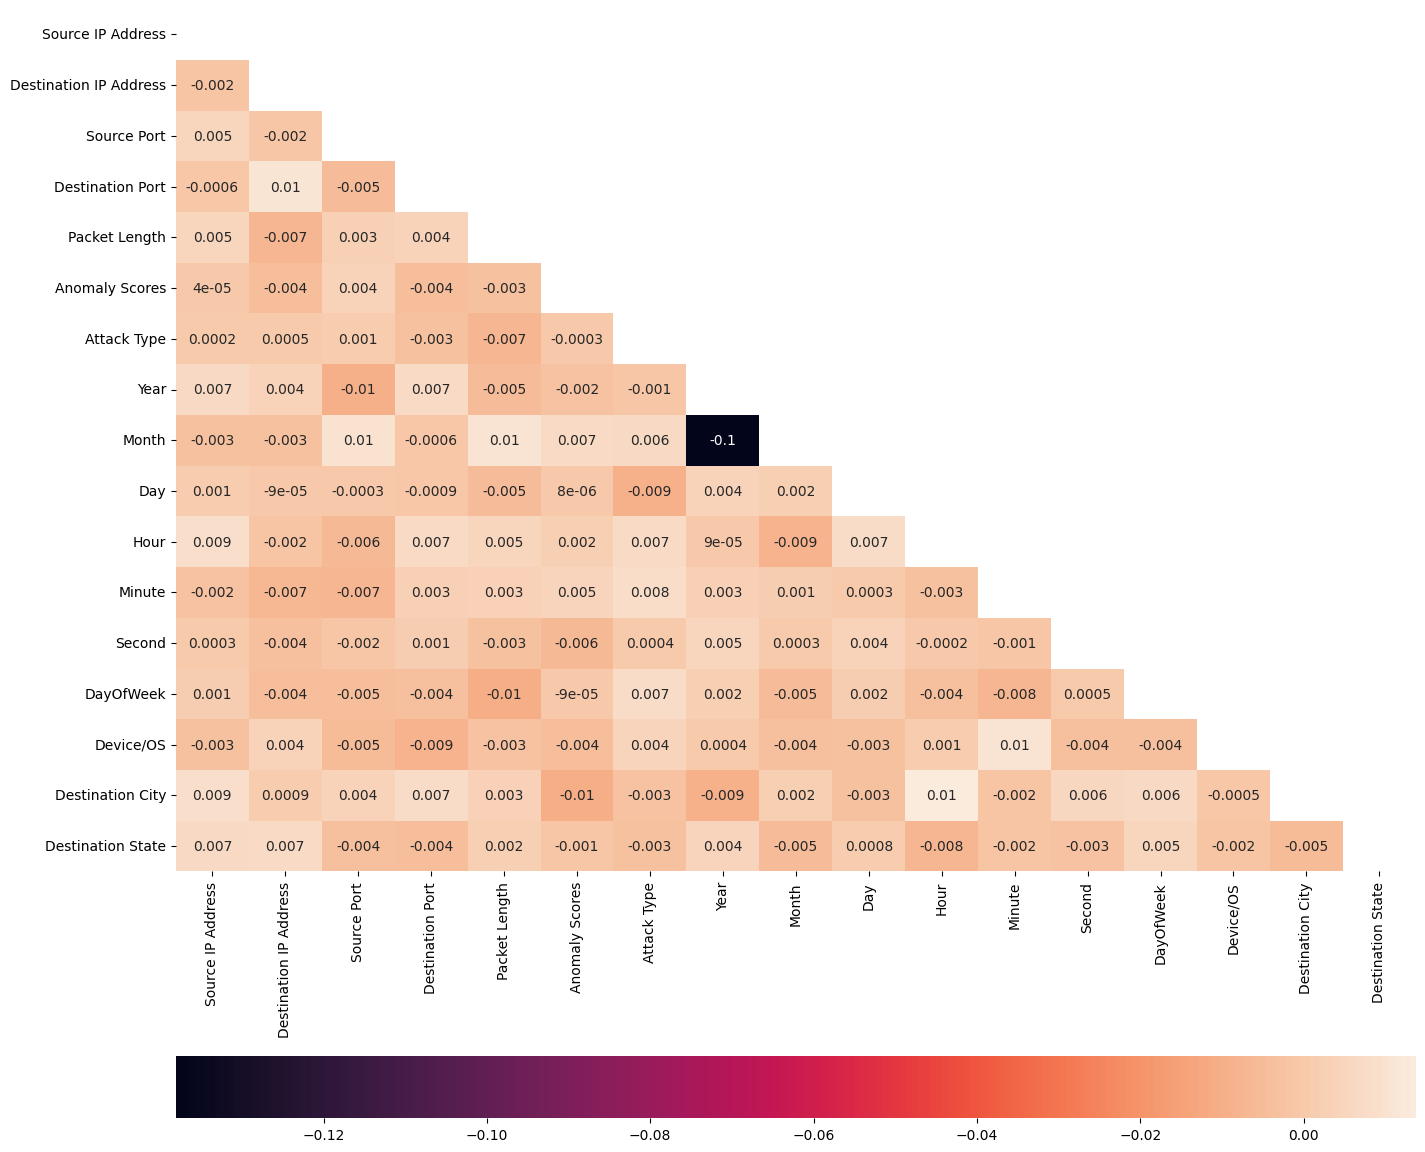

In [676]:
matrix = np.triu(data_drop_cor[corr_features].corr())
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(data_drop_cor[corr_features].corr(), annot = True, mask=matrix, fmt='.1g', cbar_kws= {'orientation': 'horizontal'})

### По матрице корреляции нет явно выраженных признаков от которых можно отказаться. 
### В целом наблюдается слабая корреляция между признаками

### Попробуем применить стекинг моделей

In [677]:
estimators = [
    ("RandomForestClassifier", RandomForestClassifier(n_estimators=300, oob_score= True)),
    ("CatBoostClassifier", CatBoostClassifier(iterations=300)),
    ("LGBMClassifier", LGBMClassifier(n_estimators=300)),
    ("XGBClassifier", xgboost.XGBClassifier(n_estimators=300, tree_method = "hist", device = "cuda")),
]

# построим классификатор используя стекинг и наш список классификаторов
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
    n_jobs=-1,
    verbose=True,
)

stacking_classifier

StackingClassifier(estimators=[('RandomForestClassifier',
                                RandomForestClassifier(n_estimators=300,
                                                       oob_score=True)),
                               ('CatBoostClassifier',
                                <catboost.core.CatBoostClassifier object at 0x00000197B861FA00>),
                               ('LGBMClassifier',
                                LGBMClassifier(n_estimators=300)),
                               ('XGBClassifier',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              co...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
                   n_jobs=-1, verbose=True)

In [679]:
stacking_classifier.fit(train_X, train_Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


StackingClassifier(estimators=[('RandomForestClassifier',
                                RandomForestClassifier(n_estimators=300,
                                                       oob_score=True)),
                               ('CatBoostClassifier',
                                <catboost.core.CatBoostClassifier object at 0x00000197B861FA00>),
                               ('LGBMClassifier',
                                LGBMClassifier(n_estimators=300)),
                               ('XGBClassifier',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              co...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
                   n_jobs=-1, verbose=True)

In [680]:
preds = stacking_classifier.predict(test_X)

print(classification_report(test_Y, preds))
print(accuracy_score(test_Y, preds))

              precision    recall  f1-score   support

         0.0       0.33      0.58      0.42      2501
         1.0       0.33      0.17      0.22      2533
         2.0       0.35      0.25      0.29      2559

    accuracy                           0.33      7593
   macro avg       0.33      0.34      0.31      7593
weighted avg       0.33      0.33      0.31      7593

0.33372843408402475
